In [2]:
### import de librairies utiles
from __future__ import division
import numpy as np
import scipy.fftpack as sf
import matplotlib.pyplot as plt
import pylab as pl
import scipy.signal as sig
from scipy import misc
import numpy as np

# Le but de ce TP est d'explorer les implémentations d'un filtre FIR et d'un IIR.

## On trace ci-dessous un signal qui mixe des hautes et des basses fréquences.

(1000,) (1000,)


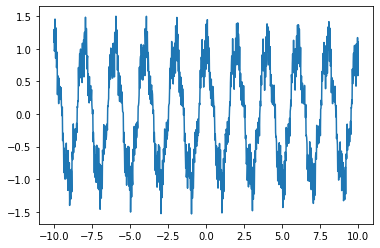

In [3]:
f = lambda t: np.cos(np.pi*t) + 0.2*np.sin(5*np.pi*t+0.1) + 0.2*np.sin(30*np.pi*t)  + 0.1*np.sin(32*np.pi*t+0.1) + 0.1*np.sin(47* np.pi*t+0.8)
t=np.linspace(-10,10,1000); signal=f(t)
print(np.shape(t),np.shape(signal))
plt.plot(t, signal)

## Q1. Implémenter un filtre passe-bas en utilisant la transformée de Fourier 1D:
### Calculer l'inverse de la FFT d'un filtre passe bas et le couper avec une fenêtre qui sera passée en argument de la fonction. Appliquer ensuite le filtre passe-bas par convolution, ou directement en fréquence avec la FFT et son inverse.


## Q2. En utilisant le code ci-dessous, implémenter un filtre à réponse impulsionnelle infinie défini par son numérateur qui sera une constante $b$ et son numérateur défini par $1-az^{-1}$. 

In [4]:
def myIIR(x,a,b):
    ### a is the numerator
    ### b is the denominator
    assert(len(a)==len(b)),"a,b must have the same length"
    y = np.zeros_like(x)
    k = len(a)
    for i in range(len(a),len(x)):
        y[i] = np.sum(np.flipud(b)*y[i-k:i]) + np.sum(np.flipud(a) * x[i-k+1:i+1])
    return y

### Que pouvez-vous dire sur le paramètre $a$ pour que le filtre soit stable ?  
### Expérimentalement, faire varier les paramètres $a$ et $b$ et commenter. Peut-on obtenir un filtre passe-bas, passe-haut. Comment le justifier avec un argument théorique ?

## Dans ce qui suit, on se donne un électrocardiogramme. On le trace en fonction du temps.

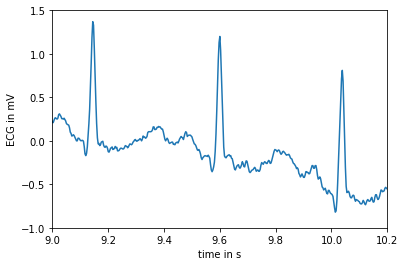

time min 0.0
time max 299.9972222222222


In [5]:
### load the data which is an electrocardiogram which is sampled at 360Hz
ecg = misc.electrocardiogram()
### Different plots.
fs = 360.0
### Since it is sampled at 360Hz, recall that Hz is the number of cycle per second, then the
### time is obtained as follows:
time = np.arange(ecg.size) / fs
### simple plot.
plt.plot(time, ecg)
plt.xlabel("time in s")
plt.ylabel("ECG in mV")
plt.xlim(9, 10.2)
plt.ylim(-1, 1.5)
plt.show()
print("time min", time[0])
print("time max", time[-1])

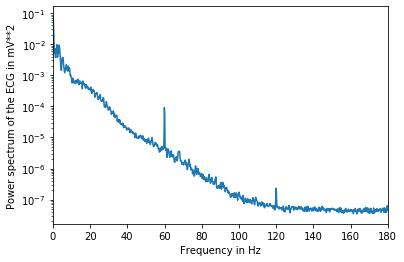

In [6]:
### Use the scipy function to get the power spectrum of the signal.
f, Pxx = sig.welch(ecg, fs=fs, nperseg=2048, scaling="spectrum")
plt.semilogy(f, Pxx)
plt.xlabel("Frequency in Hz")
plt.ylabel("Power spectrum of the ECG in mV**2")
plt.xlim(f[[0, -1]])
plt.show()

## Q3. Estimer le nombre de battements cardiaques dans l'électrocardiogramme, et l'intervalle de temps moyen entre deux battements cardiaque. Vous avez le choix de votre méthode. Une méthode possible consiste à utiliser un filtre passe-bas et extraire les maxima du signal filtré.